Team Project: Group #10
Fraudulent transaction detection


# Fraud Detection

## Goals:
- Create training set that can identify new fraud transactions
- Identify of the missing field headers

Imports:

In [0]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns

Gathering all of the data:

In [0]:
url1 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc01.csv"
url2 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc02.csv"
url3 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc03.csv"
url4 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc04.csv"
url5 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc05.csv"
url6 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc06.csv"
url7 = "https://raw.githubusercontent.com/QimeiHuang/credit_card_fraud_detection.github.io/master/cc07.csv"

#s=requests.get(url).content
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
df3 = pd.read_csv(url3)
df4 = pd.read_csv(url4)
df5 = pd.read_csv(url5)
df6 = pd.read_csv(url6)
df7 = pd.read_csv(url7)

#df=[df2,df1]
#io.StringIO(s.decode('utf-8')))
df= df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7)
#d2=d.append(df3)

Initial exploration:

In [0]:
#df.info()
#print(df)
d=df[['Time','Amount','Class']]

fraud = d['Class']>0
zero_transactions = d['Amount']<0.01
#print(fraud.info())
print(d[fraud].describe())
print(d[zero_transactions].describe())
#print(d[fraud & zero_transactions].info()

fraud_mean=d[fraud].mean()
fraud_stdev=d[fraud].std()
print(fraud_mean)

#fraud_amount = fraud['Amount']
#np=fraud['Amount'].to_numpy()
#=np.array(fraud['Amount'])


                Time       Amount  Class
count     492.000000   492.000000  492.0
mean    80746.806911   122.211321    1.0
std     47835.365138   256.683288    0.0
min       406.000000     0.000000    1.0
25%     41241.500000     1.000000    1.0
50%     75568.500000     9.250000    1.0
75%    128483.000000   105.890000    1.0
max    170348.000000  2125.870000    1.0
                Time  Amount        Class
count    1825.000000  1825.0  1825.000000
mean    89370.688767     0.0     0.014795
std     48065.662780     0.0     0.120763
min       282.000000     0.0     0.000000
25%     47284.000000     0.0     0.000000
50%     83419.000000     0.0     0.000000
75%    131288.000000     0.0     0.000000
max    172759.000000     0.0     1.000000
Time      80746.806911
Amount      122.211321
Class         1.000000
dtype: float64


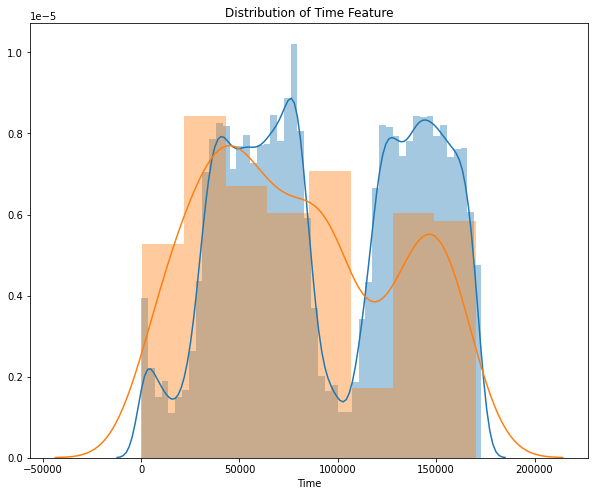

In [0]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(d.Time)
sns.distplot(d[fraud].Time)

In [0]:
print(len(df))

mask = np.random.rand(len(df))< 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

284807
Train Shape: (256653, 31)
Test Shape: (28154, 31)
There are 448 fraudulent transactions in the train data.
